# The cifar-10 dataset
Open dataset: https://en.wikipedia.org/wiki/CIFAR-10 

In [36]:
from keras.datasets import cifar10
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from sklearn.metrics import classification_report
import numpy as np

In [15]:
# load the cifar10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [18]:
x_train[0].shape # 32 x 32 x 3

(32, 32, 3)

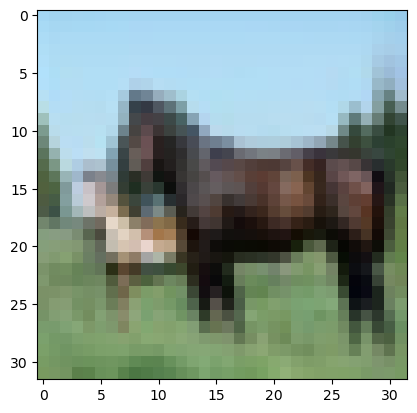

In [16]:
plt.imshow(x_train[12])
# Observation: Very blurry animal pictures

In [20]:
# Scale the images but the ranges stay the same
x_train = x_train / 255
x_test = x_test / 255

In [19]:
x_test.shape

(10000, 32, 32, 3)

In [21]:
y_train # labels
# Observation: These labels need to be one-hot encoded again, because otherwise it will end up in an optimization instead of a classification

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [23]:
# Convert y labels to one-hot encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)

In [26]:
# set up the network
model = Sequential()

# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
# Add a Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# Second layer
# Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(4,4), input_shape=(32,32,3), activation="relu"))
# Add a Pooling layer
model.add(MaxPool2D(pool_size=(2,2)))

# flatten the images
model.add(Flatten())

# dense hidden layer
model.add(Dense(256, activation="relu"))

# last layer should be the classifier
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="rmsprop", metrics=["accuracy"])

In [27]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 29, 29, 32)     │         1,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 32)     │        16,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │       205,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,610 (881.29 KB)

 Trainable params: 225,610 (881.29 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
model.fit(x_train, y_cat_train, verbose=1, epochs=5)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.5742 - loss: 1.2167
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.6428 - loss: 1.0245
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.6840 - loss: 0.9137
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7199 - loss: 0.8154
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.7455 - loss: 0.7497


In [31]:
# evaluate the model
model.metrics_names

['loss', 'compile_metrics']

In [32]:
model.evaluate(x_test, y_cat_test)
# Observation: 65 % accuracy, not too well

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6636 - loss: 1.0071


[1.023418664932251, 0.6579999923706055]

In [37]:
predictions = np.argmax(model.predict(x_test), axis=-1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [38]:
print(classification_report(y_test, predictions))
# Observation: Doing fairly similar across all categories

              precision    recall  f1-score   support

           0       0.78      0.65      0.71      1000
           1       0.75      0.82      0.78      1000
           2       0.58      0.53      0.55      1000
           3       0.41      0.61      0.49      1000
           4       0.53      0.72      0.61      1000
           5       0.66      0.44      0.53      1000
           6       0.80      0.67      0.73      1000
           7       0.74      0.69      0.72      1000
           8       0.80      0.71      0.75      1000
           9       0.74      0.75      0.75      1000

    accuracy                           0.66     10000
   macro avg       0.68      0.66      0.66     10000
weighted avg       0.68      0.66      0.66     10000

